In [2]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
df = pd.read_csv('sales_data.csv')
df.set_index('date', inplace=True)

In [13]:
train = df.iloc[:30]
test = df.iloc[30:]

arima_model = ARIMA(train['Sales'], order=(2, 1, 1))
arima_fit = arima_model.fit()

C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
arima_forecast = arima_fit.forecast(steps=6)

In [16]:
arima_forecast

2022-07-01    200.028848
2022-08-01    198.876704
2022-09-01    198.091518
2022-10-01    198.117833
2022-11-01    197.906241
2022-12-01    197.999477
Freq: MS, Name: predicted_mean, dtype: float64

In [37]:
df.index = pd.to_datetime(df.index)
arima_forecast.index = pd.to_datetime(arima_forecast.index)

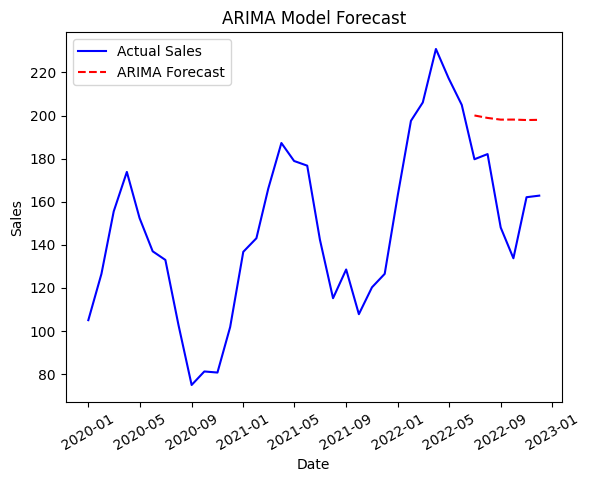

In [42]:
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.show()

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model1 = SARIMAX(train['Sales'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 12))
sarima_fit = model1.fit()

C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\AYAT LAPTOP POINT\anaconda3\envs\bia_batch_10\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

In [54]:
sarima_forecast = sarima_fit.forecast(steps=6)

In [55]:
sarima_forecast

2022-07-01    189.857881
2022-08-01    162.006669
2022-09-01    143.180910
2022-10-01    142.476681
2022-11-01    143.771141
2022-12-01    166.528465
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
sarima_forecast.index = pd.to_datetime(sarima_forecast.index)

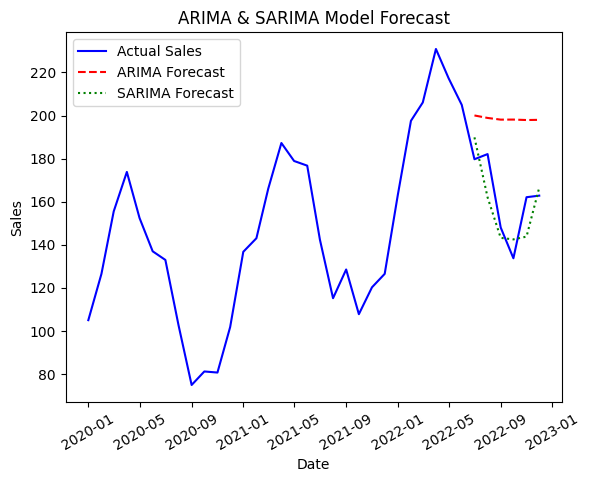

In [64]:
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='green', linestyle=':')
plt.title('ARIMA & SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.show()